<a href="https://colab.research.google.com/github/SireeshaM6/Advanced_House_Dataset/blob/main/Advanced_House_Price_Model_Note1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agenda**

1. EDA

2. Feature Engineering

3. Feature Selection

4. Model Building

5. Model Validation


['YearRemodAdd', 'ExterCond', 'HeatingQC', 'FullBath', 'HalfBath',
  'BedroomAbvGr', 'GarageArea', 'ScreenPorch', 'LotArea', 'GrLivArea',
  'Fireplaces', 'MasVnrArea', 'TotalBsmtSF', 'CentralAir', 'Street']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score,mean_absolute_percentage_error

## Hypothesis Testing Libraries
import statsmodels.formula.api as sm

In [ ]:
data  = pd.read_csv('/content/house_train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **Understand the features**

1. Id -- Unique value for each record --- Remove

2. MSSubClass -- The building class -- Identifies the type of dwelling involved in the sale.

3. MSZoning - Identifies the general zoning classification of the sale. -- Need to Encode

4. LotFrontage: Linear feet of street connected to property -- Remove because LotArea is in feet.

5. LotArea: Lot size in square feet.

6. Street: Type of road access to property -- Remove, Feels like not important.

7. LotShape: General shape of property -- Remove

8. LandContour: Flatness of the property -- Remove

9. Utilities: Type of utilities available --- Encode if necessary

10. LotConfig: Lot configuration -- Remove

11. LandSlope: Slope of property; Need to Encode.

12. Neighborhood: Physical locations within Ames city limits --- Remove

13. Condition1: Proximity to various conditions -- Remove

14. Condition2: Proximity to various conditions (if more than one is present) --- Remove.

15. BldgType: Type of dwelling --- Remove; Similar like MSSubclass.

16. HouseStyle: Style of dwelling --- Remove

17. OverallQual: Rates the overall material and finish of the house. --- Remove (Overall Condition will cover)

18. OverallCond: Rates the overall condition of the house

19. YearBuilt: Original construction date --- Remove (We have YearRemodAdd)

20. YearRemodAdd: Remodel date (same as construction date if no remodeling or additions).

21. RoofStyle: Type of roof; Need to Encode.

22. RoofMatl: Roof material -- Remove. Feels like not important.

23. Exterior1st: Exterior covering on house -- Remove

24. Exterior2nd: Exterior covering on house (if more than one material) -- Remove.

25. MasVnrType: Masonry veneer type -- Remove; Doesn't feel.

26. MasVnrArea: Masonry veneer area in square feet --- Remove.

27. ExterQual: Evaluates the quality of the material on the exterior --- Remove; Other variable is there.

28. ExterCond: Evaluates the present condition of the material on the exterior -- Need to Encode.

29. Foundation: Type of foundation -- Remove; Doesn't feel.

30. BsmtQual: Evaluates the height of the basement -- Need to Encode.

31. BsmtCond: Evaluates the general condition of the basement -- Encode.

32. BsmtQual: Evaluates the height of the basement --- Remove.

33. BsmtExposure: Refers to walkout or garden level walls -- Remove; Above feature covers.

34. BsmtFinType1: Rating of basement finished area ;-- Remove -  Doesn't feel like important.

35. BsmtFinSF1: Type 1 finished square feet -- Remove

36. BsmtFinType2: Rating of basement finished area (if multiple types) --Remove

37. BsmtFinSF2: Type 2 finished square feet -- Remove

38. BsmtUnfSF: Unfinished square feet of basement area

39. Total square feet of basement area -- Create a new feature like finished Basement Area -- Feature Enginerring.

40. Heating: Type of heating -- Remove; Doesn't fee.

41. HeatingQC: Heating quality and condition -- Need to Encode

42. CentralAir: Central air conditioning -- Need to Encode.

43. Electrical: Electrical system -- Remove; Doesn't feel.

44. 1stFlrSF: First Floor square feet

45. 2ndFlrSF: Second floor square feet

46. LowQualFinSF: Low quality finished square feet (all floors) -- Remove

## Remove below features after the correlation

47. GrLivArea: Above grade (ground) living area square feet -- Remove

48. BsmtFullBath: Basement full bathrooms -- Remove

49. BsmtHalfBath: Basement half bathrooms --- Remove

50. FullBath: Full bathrooms above grade --- Remove

51. HalfBath: Half baths above grade--- Remove

52. Bedroom: Bedrooms above grade (does NOT include basement bedrooms)--- Remove

53. Kitchen: Kitchens above grade--- Remove

54. KitchenQual: Kitchen quality -- Need to Encode

55. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

56. Functional: Home functionality (Assume typical unless deductions are warranted) -- Remove

57. Fireplaces: Number of fireplaces -- Remove; Doesn't feel

58. FireplaceQu: Fireplace quality -- Remove; Will add if necessary.

59. GarageType: Garage location -- Remove

60. GarageYrBlt: Year garage was built -- Remove

61. GarageFinish: Interior finish of the garage -- Remove

63. GarageCars: Size of garage in car capacity --- Remove

64 . GarageArea: Size of garage in square feet

65. GarageQual: Garage quality -- Remove; Another feature is there

66. GarageCond: Garage condition

67. PavedDrive: Paved driveway -- Remove; Doesn't feel

## Below features can be removed

68. WoodDeckSF: Wood deck area in square feet --- Remove

69. OpenPorchSF: Open porch area in square feet -- Remove

70. EnclosedPorch: Enclosed porch area in square feet -- Remove

71. 3SsnPorch: Three season porch area in square feet -- Remove

72. ScreenPorch: Screen porch area in square feet -- Remove

73. PoolArea: Pool area in square feet -- Remove

74. PoolQC: Pool quality -- Remove; More Null values

75. Fence: Fence quality -- Remove; More Null values

76. MiscFeature: Miscellaneous feature not covered in other categories -- Remove; More Null values.

77. MiscVal: $Value of miscellaneous feature -- Remove

78. MoSold: Month Sold (MM) -- Remove

79. YrSold: Year Sold (YYYY) --- Remove

80. SaleType: Type of sale -- Remove

81. SaleCondition: Condition of sale





In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
data.shape

(1460, 81)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# **Observations About the Dataset:**

We don't have lot of data for 81 columns. We need to remove the columns to reduce the dimensions of the dataset.

* No Duplicates

* Missing Values are present

Check the percentage of missing values and the variance of the each numerical feature.

# **Missing Values Check**

In [ ]:
# Here we will check the percentage of NaN values present in each feature
# Step - 1 : Make the list of features which has missing values

features_with_na = [features for features in data.columns if data[features].isnull().sum()>1]

# Step - 2 Print the features which has missing values

for feature in features_with_na :
    print(feature, np.round(data[feature].isnull().mean(),2),'% of Missing Values','\n')

LotFrontage 0.18 % of Missing Values 

Alley 0.94 % of Missing Values 

MasVnrType 0.01 % of Missing Values 

MasVnrArea 0.01 % of Missing Values 

BsmtQual 0.03 % of Missing Values 

BsmtCond 0.03 % of Missing Values 

BsmtExposure 0.03 % of Missing Values 

BsmtFinType1 0.03 % of Missing Values 

BsmtFinType2 0.03 % of Missing Values 

FireplaceQu 0.47 % of Missing Values 

GarageType 0.06 % of Missing Values 

GarageYrBlt 0.06 % of Missing Values 

GarageFinish 0.06 % of Missing Values 

GarageQual 0.06 % of Missing Values 

GarageCond 0.06 % of Missing Values 

PoolQC 1.0 % of Missing Values 

Fence 0.81 % of Missing Values 

MiscFeature 0.96 % of Missing Values 



## **Conclusions**:

From above, we can see below features has missing values more than 80%

1. Alley

2. Fence

3. MiscFeature

4. PoolQc

5. FireplaceQu

NOTE: We can ignore above features because if we impute, we don't get proper variance in the data.

Id feature can be removed because of the unique feature.


For the Missing Values less than 5%, we can treat the missing values by using Central Tendancy

In [ ]:
data1 = data.drop (['Id','Alley','MiscFeature','PoolQC','FireplaceQu'],axis=1)
data1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [ ]:
data1 = data1.drop(['LotShape','LandContour','Utilities','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                    'OverallQual','YearBuilt','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','Foundation',
                    'BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','Heating','Electrical','LowQualFinSF',
                    'Functional','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageQual','PavedDrive','MiscVal',
                    'MoSold','SaleType','SaleCondition','Fence','YrSold'],axis=1)

In [ ]:
data1 = data1.drop(['LotFrontage','LandSlope'],axis=1)

In [ ]:
data1.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'MasVnrArea', 'ExterCond', 'BsmtCond',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'SalePrice'],
      dtype='object')

** BedroomAbvGr - Bedrooms above grade (does NOT include basement bedrooms)

** TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

We can use TotRmsAbvGrd and we can remove BedroomAbvGr


BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

From above bathrooms list, Combine Full anf Half Bath values.


In [ ]:
data1.iloc[:,15:]

,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
0,854,1710,1,0,2,1,3,1,Gd,8,0,548,TA,0,61,0,0,0,0,208500
1,0,1262,0,1,2,0,3,1,TA,6,1,460,TA,298,0,0,0,0,0,181500
2,866,1786,1,0,2,1,3,1,Gd,6,1,608,TA,0,42,0,0,0,0,223500
3,756,1717,1,0,1,0,3,1,Gd,7,1,642,TA,0,35,272,0,0,0,140000
4,1053,2198,1,0,2,1,4,1,Gd,9,1,836,TA,192,84,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,694,1647,0,0,2,1,3,1,TA,7,1,460,TA,0,40,0,0,0,0,175000
1456,0,2073,1,0,2,0,3,1,TA,7,2,500,TA,349,0,0,0,0,0,210000
1457,1152,2340,0,0,2,0,4,1,Gd,9,2,252,TA,0,60,0,0,0,0,266500
1458,0,1078,1,0,1,0,2,1,Gd,5,0,240,TA,366,0,112,0,0,0,142125


In [ ]:
numeric_features = [feature for feature in data1.columns if data1[feature].dtypes != 'O']
print(len(numeric_features))

26


# **Variance of each feature - Numerical Features**

In [ ]:
data1['ScreenPorch'].nunique()

76

In [ ]:
unique_values = {}

for col in data1.columns:
    values = data1[col].nunique()
    if values > 700:
      unique_values[col] = values


In [ ]:
 unique_values

{'LotArea': 1073,
 'BsmtUnfSF': 780,
 'TotalBsmtSF': 721,
 '1stFlrSF': 753,
 'GrLivArea': 861}

# **Observations About Numeric Features:**

Since the total number of Observations are 1460 and if a variable has a lot of variance in the features, it doesn't find any pattern.

Let's remove the above fatures

{'LotArea': 1073,

 'BsmtUnfSF': 780,

 'TotalBsmtSF': 721,

 '1stFlrSF': 753,

 'GrLivArea': 861}

In [ ]:
data1 = data1.drop(['BsmtUnfSF','1stFlrSF','KitchenQual','GarageCond','BsmtCond','2ndFlrSF','BsmtFullBath','BsmtHalfBath','MSZoning','RoofStyle'],axis=1)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   OverallCond    1460 non-null   int64 
 2   YearRemodAdd   1460 non-null   int64 
 3   ExterCond      1460 non-null   object
 4   HeatingQC      1460 non-null   object
 5   FullBath       1460 non-null   int64 
 6   HalfBath       1460 non-null   int64 
 7   BedroomAbvGr   1460 non-null   int64 
 8   KitchenAbvGr   1460 non-null   int64 
 9   TotRmsAbvGrd   1460 non-null   int64 
 10  GarageArea     1460 non-null   int64 
 11  WoodDeckSF     1460 non-null   int64 
 12  OpenPorchSF    1460 non-null   int64 
 13  EnclosedPorch  1460 non-null   int64 
 14  3SsnPorch      1460 non-null   int64 
 15  ScreenPorch    1460 non-null   int64 
 16  PoolArea       1460 non-null   int64 
 17  YrSold         1460 non-null   int64 
 18  SalePrice      1460 non-null

In [ ]:
data1.head()

,MSSubClass,LotArea,Street,OverallCond,YearRemodAdd,MasVnrArea,ExterCond,TotalBsmtSF,HeatingQC,CentralAir,...,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
0,60,8450,Pave,5,2003,196.0,TA,856,Ex,Y,...,8,0,548,0,61,0,0,0,0,208500
1,20,9600,Pave,8,1976,0.0,TA,1262,Ex,Y,...,6,1,460,298,0,0,0,0,0,181500
2,60,11250,Pave,5,2002,162.0,TA,920,Ex,Y,...,6,1,608,0,42,0,0,0,0,223500
3,70,9550,Pave,5,1970,0.0,TA,756,Gd,Y,...,7,1,642,0,35,272,0,0,0,140000
4,60,14260,Pave,5,2000,350.0,TA,1145,Ex,Y,...,9,1,836,192,84,0,0,0,0,250000


# **Correlation b/w the features**

<ipython-input-138-18b1779a0ba5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data1.corr()


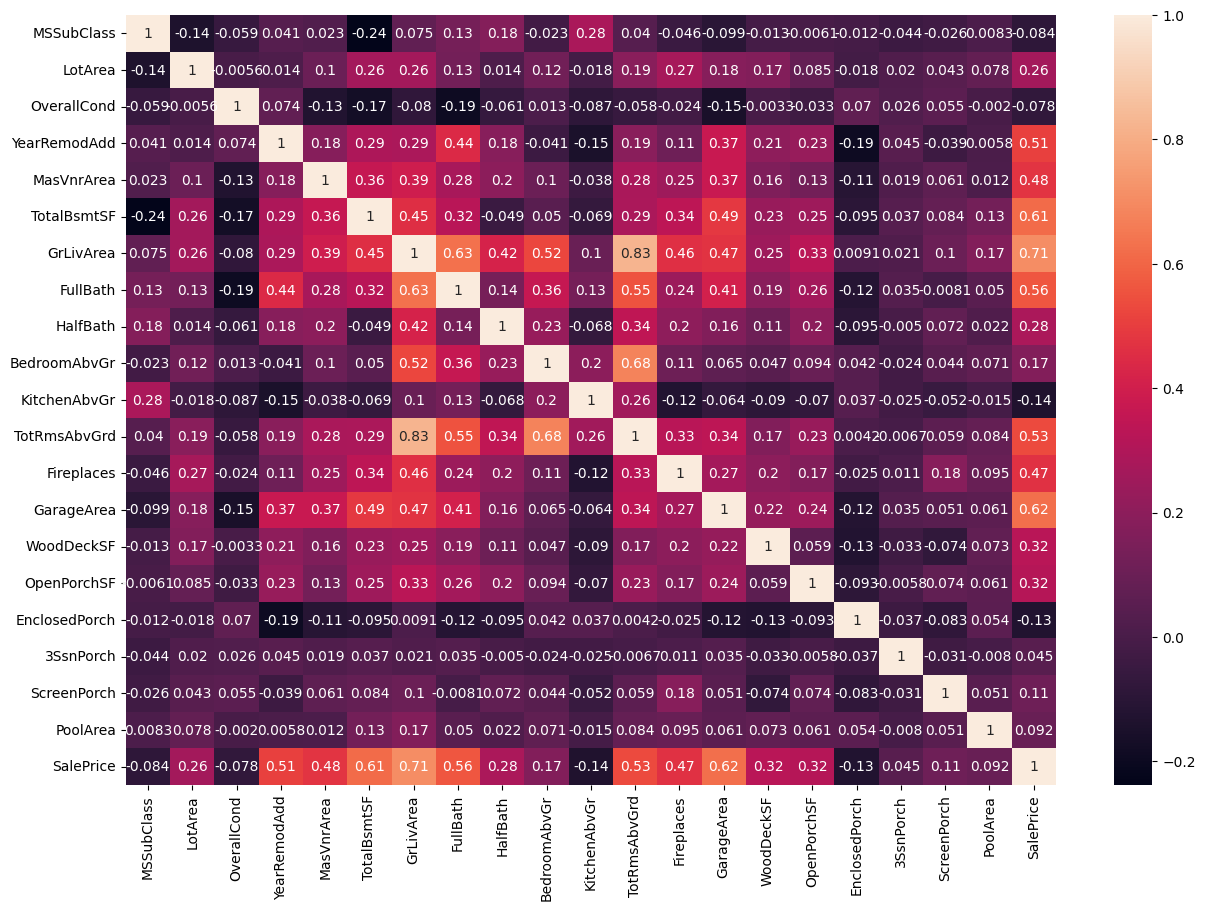

In [ ]:
corr = data1.corr()
features = corr.index
plt.figure(figsize=(15,10))
sns.heatmap(data1[features].corr(),annot=True)
plt.show()

# **Observations**
Based on the correlation, remove the features

1. OpenPorchSF

2. 3SsnPorch

3. TotRmsAbvGrd


In [ ]:
data1 = data1.drop(['Street','OpenPorchSF','3SsnPorch','TotRmsAbvGrd','MSSubClass','OverallCond','KitchenAbvGr','WoodDeckSF','PoolArea','EnclosedPorch'],axis=1)

# **Remove Unnecessary Features**

1. MSSubClass

2. OverallCond

3. YrSold

4. KitchenAbvGr

In [ ]:
data1.columns

Index(['LotArea', 'Street', 'YearRemodAdd', 'MasVnrArea', 'ExterCond',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'ScreenPorch',
       'SalePrice'],
      dtype='object')

In [ ]:
data1['CentralAir'] = data1['CentralAir'].replace('Y',1)
data1['CentralAir'] = data1['CentralAir'].replace('N',0)

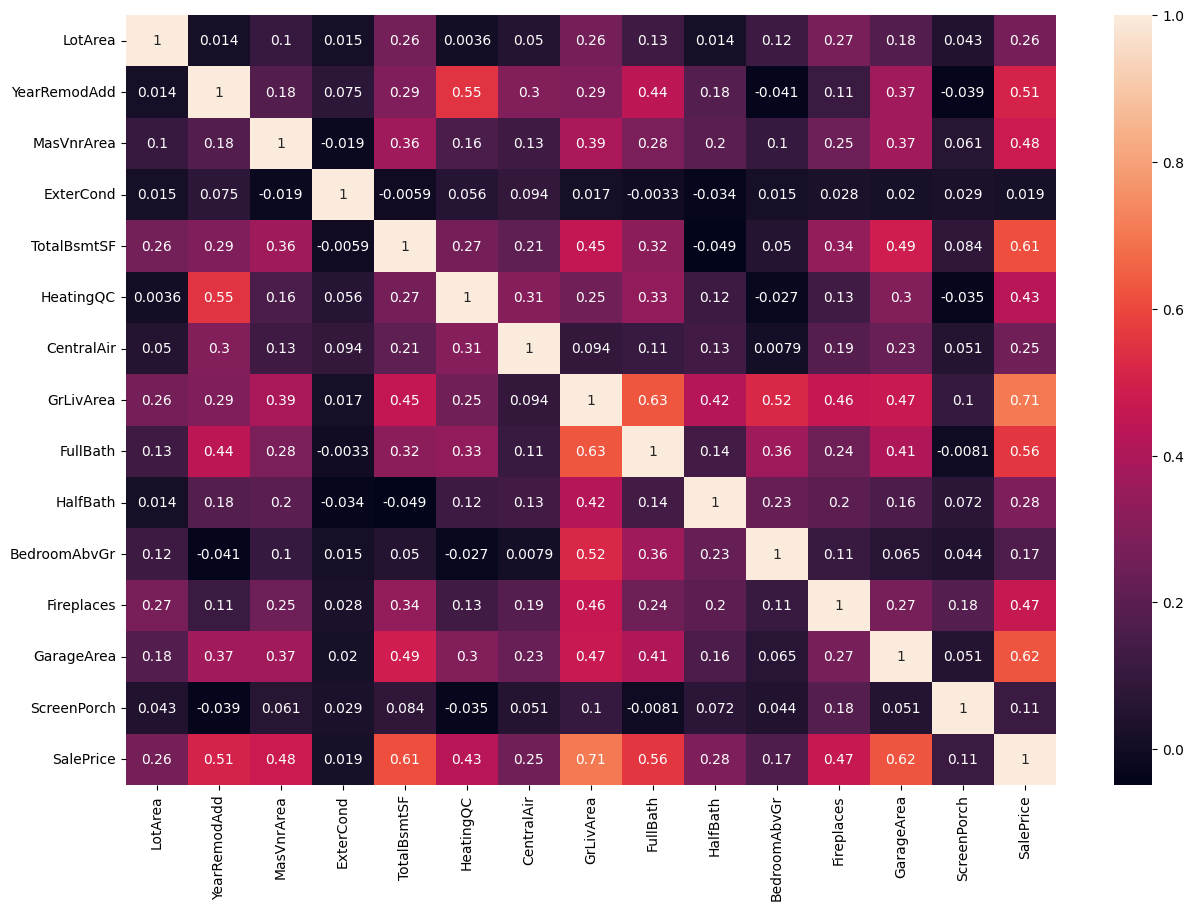

In [ ]:
corr = data1.corr()
features = corr.index
plt.figure(figsize=(15,10))
sns.heatmap(data1[features].corr(),annot=True)
plt.show()

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   YearRemodAdd  1460 non-null   int64  
 2   MasVnrArea    1460 non-null   float64
 3   ExterCond     1460 non-null   int64  
 4   TotalBsmtSF   1460 non-null   int64  
 5   HeatingQC     1460 non-null   int64  
 6   CentralAir    1460 non-null   int64  
 7   GrLivArea     1460 non-null   int64  
 8   FullBath      1460 non-null   int64  
 9   HalfBath      1460 non-null   int64  
 10  BedroomAbvGr  1460 non-null   int64  
 11  Fireplaces    1460 non-null   int64  
 12  GarageArea    1460 non-null   int64  
 13  ScreenPorch   1460 non-null   int64  
 14  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 171.2 KB


# **Label Encoding**

In [ ]:
data1['ExterCond'] = data1['ExterCond'].replace('Ex',5)
data1['ExterCond'] = data1['ExterCond'].replace('Gd',4)
data1['ExterCond'] = data1['ExterCond'].replace('TA',3)
data1['ExterCond'] = data1['ExterCond'].replace('Fa',2)
data1['ExterCond'] = data1['ExterCond'].replace('Po',1)

In [ ]:
data1['HeatingQC'] = data1['HeatingQC'].replace('Ex',5)
data1['HeatingQC'] = data1['HeatingQC'].replace('Gd',4)
data1['HeatingQC'] = data1['HeatingQC'].replace('TA',3)
data1['HeatingQC'] = data1['HeatingQC'].replace('Fa',2)
data1['HeatingQC'] = data1['HeatingQC'].replace('Po',1)

In [ ]:
data1.isnull().sum()

LotArea         0
Street          0
YearRemodAdd    0
MasVnrArea      8
ExterCond       0
TotalBsmtSF     0
HeatingQC       0
CentralAir      0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
Fireplaces      0
GarageArea      0
ScreenPorch     0
SalePrice       0
dtype: int64

# **Missing Value Imputation** -- Central Tendency

I want to impute the values Randomly .



In [ ]:
data1['MasVnrArea'].mean(), data1['MasVnrArea'].median()

(103.68526170798899, 0.0)

In [ ]:
data1['MasVnrArea'] = data1['MasVnrArea'].fillna(data1['MasVnrArea'].mean())

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data1.drop(['SalePrice'],axis=1),data1['SalePrice'],test_size=0.20,random_state=1)
print('Splitting is done')

Splitting is done


In [ ]:
rf_model = RandomForestRegressor(n_estimators=60,max_depth=7)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=60)

In [ ]:
y_pred = rf_model.predict(X_test)
error = mean_absolute_percentage_error(y_test,y_pred)*100
error

13.215052249801104

In [ ]:
r2_score(y_test,y_pred)*100

84.10484877713081

# Variable Importance Plot from Random Forest

In [ ]:
imp_df = pd.DataFrame({'Feature':X_train.columns,'Imp_Score':rf_model.feature_importances_})
imp_df = imp_df.sort_values('Imp_Score',ascending=False)
imp_df

,Feature,Imp_Score
7,GrLivArea,0.390441
4,TotalBsmtSF,0.211632
12,GarageArea,0.193140
1,YearRemodAdd,0.086205
2,MasVnrArea,0.034121
0,LotArea,0.032089
11,Fireplaces,0.012810
8,FullBath,0.009669
10,BedroomAbvGr,0.007561
5,HeatingQC,0.006474


In [ ]:
X_train.columns

Index(['LotArea', 'YearRemodAdd', 'MasVnrArea', 'ExterCond', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'ScreenPorch'],
      dtype='object')

## **Observations**

1. With below columns performed the Variable Importance Plot --- 51.7 is the r2_score.

['MSSubClass', 'OverallCond', 'YearRemodAdd', 'ExterCond', 'HeatingQC',
  'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea',
  'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'YrSold']


Adding couple of columns to increase the training score

2. With below columns got  --- 83.91

['YearRemodAdd', 'ExterCond', 'HeatingQC', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'GarageArea', 'ScreenPorch', 'LotArea', 'GrLivArea',
       'Fireplaces', 'MasVnrArea', 'TotalBsmtSF']

3. Check the other columns also


# **Hypothesis Testing - To get the P-Values**

In [ ]:
train_data = pd.concat([X_train,y_train],axis=1)
train_data.head()

,LotArea,YearRemodAdd,MasVnrArea,ExterCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,ScreenPorch,SalePrice
921,8777,2003,0.0,3,1272,4,1,2200,2,2,4,0,0,0,145900
520,10800,2000,0.0,3,0,3,0,1294,2,0,3,0,0,0,106250
401,8767,2005,0.0,3,1310,5,1,1310,2,0,3,1,400,0,164990
280,11287,1989,340.0,3,807,4,1,1982,2,1,3,1,575,0,228500
1401,7415,2004,0.0,3,839,5,1,1593,2,1,3,1,398,0,193000


In [ ]:
train_data.columns

Index(['LotArea', 'YearRemodAdd', 'MasVnrArea', 'ExterCond', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'ScreenPorch', 'SalePrice'],
      dtype='object')

In [ ]:
ols_model = sm.ols('SalePrice ~ LotArea+YearRemodAdd+MasVnrArea+ExterCond+TotalBsmtSF+HeatingQC+CentralAir+GrLivArea+FullBath+HalfBath+BedroomAbvGr+Fireplaces+GarageArea+ScreenPorch', data=train_data)

results = ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     225.9
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          2.95e-318
Time:                        07:18:45   Log-Likelihood:                -14044.
No. Observations:                1168   AIC:                         2.812e+04
Df Residuals:                    1153   BIC:                         2.819e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.314e+06    1.5e+05     -8.749      0.000   -1.61e+06   -1.02e+06
LotArea          0.4386      0.130      3.366      0.001       0.183       0.694
YearRemodAdd   662.3053     77.906      8.501      0.000     509.451     815.159
MasVnrArea      48.3007      7.676      6.292      0.000      33.239      63.362
ExterCond    -2464.9202   3425.149     -0.720      0.472   -9185.143    4255.302
TotalBsmtSF     32.8060      3.541      9.266      0.000      25.859      39.753
HeatingQC     7442.4428   1551.847      4.796      0.000    4397.683    1.05e+04
CentralAir    2102.3183   5417.196      0.388      0.698   -8526.348    1.27e+04
GrLivArea       44.7807      4.392     10.197      0.000      36.164      53.397
FullBath      1.379e+04   3151.427      4.376      0.000    7607.390       2e+04
HalfBath      6758.6421   2855.895      2.367      0.018    1155.309    1.24e+04
BedroomAbvGr -6889.6899   1904.130     -3.618      0.000   -1.06e+04   -3153.741
Fireplaces    1.212e+04   2210.304      5.483      0.000    7782.587    1.65e+04
GarageArea      64.0290      7.323      8.743      0.000      49.661      78.397
ScreenPorch     68.2709     21.120      3.233      0.001      26.833     109.709
==============================================================================
Omnibus:                      597.173   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68494.635
Skew:                          -1.368   Prob(JB):                         0.00
Kurtosis:                      40.416   Cond. No.                     1.85e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Observations from Hypothesis Testing**

1. CentraAir and ExternalCond has high P-values. After Hypothesis, let's remove the ExternalCond feature.

# **Multicollinearity Validation - variance inflation factor**